In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://api.covidtracking.com/v1/states/gu/daily.csv'
df = pd.read_csv(url, parse_dates=['date'])
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-10-12,GU,3170,9.0,52520,NaN,55690,65.0,NaN,12.0,...,55690,0,0,c00d72d50d11f9efa7a48cec731eea7c46c7bbb4,0,0,0,0,0,NaN
1,2020-10-11,GU,3078,7.0,51893,NaN,54971,60.0,NaN,12.0,...,54971,1,0,d342d06d88be3170e9c0f461be5644e9ae4b55cb,0,0,0,0,0,NaN
2,2020-10-10,GU,3056,7.0,51760,NaN,54816,62.0,NaN,13.0,...,54816,1,0,35143af60bd731b154d7d2826dc0766deb8ef83f,0,0,0,0,0,NaN
3,2020-10-09,GU,2989,7.0,51506,NaN,54495,55.0,NaN,14.0,...,54495,0,0,c2dc51628d37a688a9290ca38e81b5eaadf32645,0,0,0,0,0,NaN
4,2020-10-08,GU,2934,5.0,51137,NaN,54071,50.0,NaN,15.0,...,54071,1,0,660fb7d90f097a40d8935ce5f6838a917754a8a4,0,0,0,0,0,NaN


---

- Column descriptions can be found at "https://covidtracking.com/data/api" under "Historic values for a single state"

---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 55 columns):
date                           211 non-null datetime64[ns]
state                          211 non-null object
positive                       211 non-null int64
probableCases                  177 non-null float64
negative                       211 non-null int64
pending                        0 non-null float64
totalTestResults               211 non-null int64
hospitalizedCurrently          155 non-null float64
hospitalizedCumulative         0 non-null float64
inIcuCurrently                 106 non-null float64
inIcuCumulative                0 non-null float64
onVentilatorCurrently          18 non-null float64
onVentilatorCumulative         0 non-null float64
recovered                      199 non-null float64
dataQualityGrade               171 non-null object
lastUpdateEt                   211 non-null object
dateModified                   211 non-null object
checkTimeEt            

In [4]:
#remove columns with no data recorded, columns not necessary for analysis, 
#columns displaying the same data as others, & depreciated data
columns = ['deathConfirmed', 'deathProbable', 'hospitalized', 
         'hospitalizedCumulative', 'inIcuCumulative', 'negativeTestsAntibody', 'pending',
         'negativeTestsPeopleAntibody', 'onVentilatorCumulative',
         'positiveTestsAntigen', 'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
         'totalTestEncountersViral', 'totalTestsAntigen', 'totalTestsPeopleAntibody', 
         'totalTestsPeopleAntigen', 'hospitalizedIncrease', 'hash', 'commercialScore',
         'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
          'grade', 'totalTestResultsSource', 'state', 'lastUpdateEt', 'dateModified',
          'checkTimeEt', 'dateChecked', 'fips', 'total', 'posNeg', 'dataQualityGrade']
df_1 = df.drop(columns, axis=1)

In [5]:
df_1.head()

,date,positive,probableCases,negative,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,death,...,positiveTestsViral,negativeTestsViral,positiveCasesViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease
0,2020-10-12,3170,9.0,52520,55690,65.0,12.0,NaN,2189.0,60.0,...,NaN,NaN,3161.0,55681.0,197.0,5.0,92,627,719,0
1,2020-10-11,3078,7.0,51893,54971,60.0,12.0,NaN,2072.0,60.0,...,NaN,NaN,3071.0,54964.0,192.0,3.0,22,133,155,1
2,2020-10-10,3056,7.0,51760,54816,62.0,13.0,NaN,2072.0,59.0,...,NaN,NaN,3049.0,54809.0,192.0,3.0,67,254,321,1
3,2020-10-09,2989,7.0,51506,54495,55.0,14.0,NaN,2072.0,58.0,...,NaN,NaN,2982.0,54488.0,192.0,3.0,55,369,424,0
4,2020-10-08,2934,5.0,51137,54071,50.0,15.0,NaN,2067.0,58.0,...,NaN,NaN,2929.0,54066.0,192.0,3.0,66,517,583,1


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 21 columns):
date                        211 non-null datetime64[ns]
positive                    211 non-null int64
probableCases               177 non-null float64
negative                    211 non-null int64
totalTestResults            211 non-null int64
hospitalizedCurrently       155 non-null float64
inIcuCurrently              106 non-null float64
onVentilatorCurrently       18 non-null float64
recovered                   199 non-null float64
death                       205 non-null float64
totalTestsViral             145 non-null float64
positiveTestsViral          33 non-null float64
negativeTestsViral          33 non-null float64
positiveCasesViral          177 non-null float64
totalTestsPeopleViral       141 non-null float64
totalTestsAntibody          139 non-null float64
positiveTestsAntibody       139 non-null float64
positiveIncrease            211 non-null int64
negativeIncrease 

In [7]:
#create column with daily positive result rate
df_1['positive_rate'] = round((df_1['positiveIncrease']/df_1['totalTestResultsIncrease']) * 100, 2)

In [8]:
df_1['positive_rate'].head()

0    12.80
1    14.19
2    20.87
3    12.97
4    11.32
Name: positive_rate, dtype: float64

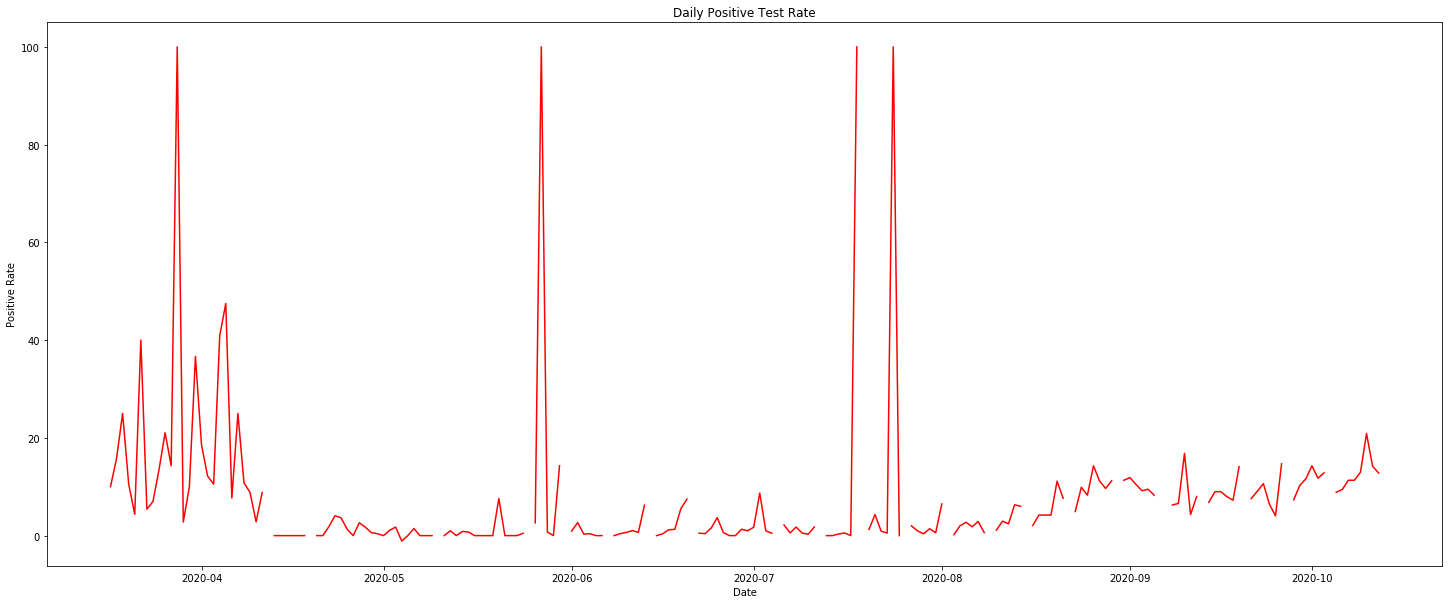

In [9]:
#plot daily positive rate by date

# Create figure and plot space
fig, ax = plt.subplots(figsize=(25, 10))

# Add x-axis and y-axis
ax.plot(df_1['date'],
        df_1['positive_rate'],
        color='red')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Positive Rate",
       title="Daily Positive Test Rate")

plt.show()

In [10]:
df_1['positive_rate'].unique()

array([ 12.8 ,  14.19,  20.87,  12.97,  11.32,  11.34,   9.43,   8.87,
          nan,  12.85,  11.75,  14.29,  11.63,  10.27,   7.32,  14.69,
         4.04,   6.42,  10.64,   9.07,   7.58,  14.1 ,   7.25,   7.96,
         9.  ,   8.97,   6.78,   8.  ,   4.3 ,  16.83,   6.59,   6.26,
         8.27,   9.49,   9.18,  10.47,  11.87,  11.24,   9.65,  11.18,
         9.89,   4.93,   7.65,  11.15,   4.2 ,   4.19,   2.07,   6.01,
         6.31,   2.42,   2.96,   1.1 ,   0.6 ,   2.89,   1.81,   2.73,
         2.  ,   0.19,   6.47,   0.59,   1.41,   0.37,   0.96,   0.  ,
       100.  ,   0.52,   0.92,   1.26,   0.54,   0.34,   1.77,   0.3 ,
         0.51,   1.75,   0.55,   2.18,   0.49,   0.97,   8.72,   1.71,
         1.  ,   1.31,   0.63,   3.68,   1.55,   0.4 ,   7.46,   5.51,
         1.28,   1.2 ,   0.36,   6.25,   0.68,   1.02,   0.65,   0.39,
         2.67,   0.93,   0.72,   2.61,   0.48,   7.59,   0.74,   0.85,
         0.98,   1.46,  -1.12,   1.09,   0.38,   0.61,   1.72,   2.63,
      

In [11]:
df_1.loc[df_1['positive_rate']== 100.00]

,date,positive,probableCases,negative,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,death,...,negativeTestsViral,positiveCasesViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,positive_rate
80,2020-07-24,337,8.0,19132,19469,0.0,NaN,NaN,244.0,5.0,...,NaN,329.0,19461.0,145.0,2.0,5,0,5,0,100.0
86,2020-07-18,315,8.0,17938,18253,4.0,NaN,NaN,222.0,5.0,...,NaN,307.0,18245.0,145.0,2.0,1,0,1,0,100.0
138,2020-05-27,170,7.0,5515,5685,1.0,NaN,NaN,143.0,5.0,...,NaN,163.0,5685.0,54.0,1.0,1,0,1,0,100.0
198,2020-03-28,55,NaN,299,354,15.0,NaN,NaN,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,4,0,4,0,100.0


In [12]:
#for positive_rate graph: need to remove columns with 100% positive rate, 
                         #minimal testing done and all positive results. 
                         #seems like incomplete data

In [13]:
df_1.loc[df_1['positive_rate']== 0.00]

,date,positive,probableCases,negative,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,death,...,negativeTestsViral,positiveCasesViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,positive_rate
79,2020-07-25,337,8.0,19695,20032,1.0,NaN,NaN,244.0,5.0,...,NaN,329.0,20024.0,145.0,2.0,0,563,563,0,0.0
87,2020-07-17,314,8.0,17938,18252,4.0,NaN,NaN,214.0,5.0,...,NaN,306.0,18244.0,145.0,2.0,0,241,241,0,0.0
90,2020-07-14,312,8.0,17225,17537,3.0,NaN,NaN,210.0,5.0,...,NaN,304.0,17529.0,142.0,2.0,0,195,195,0,0.0
91,2020-07-13,312,8.0,17030,17342,3.0,NaN,NaN,202.0,5.0,...,NaN,304.0,17334.0,142.0,2.0,0,363,363,0,0.0
106,2020-06-28,248,8.0,12130,12378,1.0,NaN,NaN,179.0,5.0,...,11284.0,240.0,12370.0,125.0,2.0,0,227,227,0,0.0
107,2020-06-27,248,8.0,11903,12151,1.0,NaN,NaN,179.0,5.0,...,11284.0,240.0,12143.0,125.0,2.0,0,259,259,0,0.0
119,2020-06-15,185,8.0,8573,8758,NaN,NaN,NaN,169.0,5.0,...,8531.0,177.0,8750.0,114.0,2.0,0,215,215,0,0.0
126,2020-06-08,179,8.0,7550,7729,NaN,NaN,NaN,163.0,5.0,...,7550.0,171.0,NaN,109.0,2.0,0,266,266,0,0.0
128,2020-06-06,179,8.0,7284,7463,NaN,NaN,NaN,162.0,5.0,...,6945.0,171.0,NaN,105.0,2.0,0,89,89,0,0.0
129,2020-06-05,179,8.0,7195,7374,NaN,NaN,NaN,162.0,5.0,...,6945.0,171.0,NaN,105.0,2.0,0,390,390,0,0.0


In [14]:
df_1.loc[df_1['positive_rate']== -1.12]

,date,positive,probableCases,negative,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,death,...,negativeTestsViral,positiveCasesViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,positive_rate
161,2020-05-04,149,4.0,3242,3391,NaN,NaN,NaN,125.0,5.0,...,NaN,145.0,NaN,NaN,NaN,-1,90,89,0,-1.12


In [15]:
df_1.loc[df_1['positive_rate'].isna()]

,date,positive,probableCases,negative,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,death,...,negativeTestsViral,positiveCasesViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,positive_rate
8,2020-10-04,2699,2.0,49057,51756,29.0,12.0,NaN,1887.0,52.0,...,NaN,2697.0,51754.0,184.0,3.0,0,0,0,1,NaN
15,2020-09-27,2354,0.0,46365,48719,30.0,9.0,NaN,1668.0,43.0,...,NaN,2354.0,48719.0,179.0,3.0,0,0,0,0,NaN
22,2020-09-20,2117,0.0,43841,45958,36.0,19.0,NaN,1450.0,34.0,...,NaN,2117.0,45958.0,172.0,3.0,0,0,0,0,NaN
29,2020-09-13,1891,0.0,41472,43363,50.0,11.0,NaN,1118.0,26.0,...,NaN,1891.0,43363.0,158.0,2.0,0,0,0,1,NaN
35,2020-09-07,1671,0.0,39070,40741,57.0,14.0,NaN,744.0,18.0,...,NaN,1671.0,40741.0,158.0,2.0,0,0,0,2,NaN
36,2020-09-06,1671,0.0,39070,40741,57.0,14.0,NaN,744.0,16.0,...,NaN,1671.0,40741.0,158.0,2.0,0,0,0,1,NaN
43,2020-08-30,1347,8.0,36113,37460,36.0,4.0,NaN,488.0,10.0,...,NaN,1339.0,37452.0,158.0,2.0,0,0,0,0,NaN
51,2020-08-22,767,8.0,30749,31516,14.0,3.0,NaN,394.0,7.0,...,NaN,759.0,31508.0,155.0,2.0,0,0,0,0,NaN
58,2020-08-15,502,8.0,26594,27096,8.0,2.0,NaN,345.0,5.0,...,NaN,494.0,27088.0,153.0,2.0,0,0,0,0,NaN
64,2020-08-09,412,8.0,24117,24529,3.0,NaN,NaN,321.0,5.0,...,NaN,404.0,24521.0,147.0,2.0,0,0,0,0,NaN


In [16]:
# Investigate data quality grade further

In [17]:
# FOR PLOTTING PURPOSES OF POSITIVE RATE, CREATE NEW DF WITH:

#remove row 153: incomplete data with negative positive rate
#create new df without sundays
#remove rows with 100% positive rate
